<a href="https://colab.research.google.com/github/Farhan-ANWAR0611/Capstone-Project-Deep-Learning-for-Computer-Vision.ipynb/blob/main/Capstone_Project_Deep_Learning_for_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Capstone Project: Deep Learning for Computer Vision**

**contribution - individual**

In [ ]:
github -

# 🎭 DeepFER - Facial Emotion Recognition with CNN

This project aims to build a deep learning model that can recognize human emotions from facial images using Convolutional Neural Networks (CNN).  
We use the FER2013 dataset, which contains 48x48 grayscale images labeled with seven emotion classes: Angry, Disgust, Fear, Happy, Sad, Surprise, and Neutral.  
The model is trained using CNN layers along with dropout and batch normalization for better generalization.  
We also explore transfer learning to improve performance.  
After training, the model is evaluated using accuracy, precision, recall, and F1-score.  
Although the model's predictions are not perfect, it demonstrates the full pipeline of building an intelligent emotion recognition system.  
This project lays the foundation for real-time emotion-aware applications in education, healthcare, and human-computer interaction.


In [ ]:
# Download and load the FER2013 dataset
!wget -O fer2013.csv https://www.dropbox.com/s/1op3l6u9f2xg6mi/fer2013.csv?dl=1

import pandas as pd
import numpy as np

# Load the CSV
df = pd.read_csv("/new face csv.csv")
print("Dataset shape:", df.shape)

--2025-06-06 11:52:07--  https://www.dropbox.com/s/1op3l6u9f2xg6mi/fer2013.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘fer2013.csv’

fer2013.csv             [ <=>                ]  70.07K  --.-KB/s    in 0.03s   

2025-06-06 11:52:07 (2.57 MB/s) - ‘fer2013.csv’ saved [71756]

Dataset shape: (17495, 3)


In [ ]:
# Map emotion labels
emotion_map = {
    0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy",
    4: "Sad", 5: "Surprise", 6: "Neutral"
}
df['emotion_label'] = df['emotion'].map(emotion_map)

# Convert pixel string to image arrays
# Filter out empty strings and non-string entries before processing
X = []
y_filtered = [] # Create a new list for filtered labels

for index, row in df.iterrows():
    pixels = row['pixels']
    if isinstance(pixels, str) and pixels:
        try:
            pixel_array = np.fromstring(pixels, sep=' ')
            if pixel_array.size == 48 * 48:
                X.append(pixel_array.reshape(48, 48, 1))
                y_filtered.append(row['emotion'])
            else:
                print(f"Skipping row {index} due to incorrect pixel count: {pixel_array.size}")
        except ValueError as e:
            print(f"Skipping row {index} due to error processing pixels: {pixels} - {e}")
    else:
        print(f"Skipping row {index} due to invalid pixel entry: {pixels}")


X = np.array(X)
X = X / 255.0  # Normalize
y = np.array(y_filtered) # Use the filtered labels

# One-hot encode labels
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=7)

Skipping row 17494 due to incorrect pixel count: 831


In [ ]:
from sklearn.model_selection import train_test_split

# 80% train, 10% val, 10% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Train: (13995, 48, 48, 1), Val: (1749, 48, 48, 1), Test: (1750, 48, 48, 1)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf # Import tensorflow

# Augmentation for training data
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

# No augmentation for validation and test data
val_datagen = ImageDataGenerator()

# Generate batches
train_generator = train_datagen.flow(X_train, y_train, batch_size=64)
val_generator = val_datagen.flow(X_val, y_val, batch_size=64)

# Convert generators to tf.data.Dataset
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 48, 48, 1], [None, 7])
)

val_dataset = tf.data.Dataset.from_generator(
    lambda: val_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 48, 48, 1], [None, 7])
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotion classes
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,775 (3.42 MB)

 Trainable params: 895,879 (3.42 MB)

 Non-trainable params: 896 (3.50 KB)

In [59]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('model_epoch_{epoch:02d}.weights.h5', save_weights_only=True)

history = model.fit(
    train_dataset,  # Use the tf.data.Dataset for training
    epochs=10,
    validation_data=val_dataset, # Use the tf.data.Dataset for validation
    callbacks=[checkpoint]
)

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 999ms/step - accuracy: 0.4572 - loss: 1.3836

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


219/219 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.4572 - loss: 1.3837 - val_accuracy: 0.4991 - val_loss: 1.3294
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.4578 - loss: 1.3968 - val_accuracy: 0.4728 - val_loss: 1.3438
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.4589 - loss: 1.3787 - val_accuracy: 0.4900 - val_loss: 1.4047
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.4634 - loss: 1.3765 - val_accuracy: 0.5094 - val_loss: 1.2911
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.4689 - loss: 1.3803 - val_accuracy: 0.5352 - val_loss: 1.2368
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 218s 996ms/step - accuracy: 0.4763 - loss: 1.3565 - val_accuracy: 0.4260 - val_loss: 1.4674
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 216s 987ms/step - accuracy: 0.4745 - loss: 1.3572 - val_accuracy: 0.5294 - val_loss: 1.2463
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 218s 995ms/step - accuracy: 0.4797 - loss: 1.3400 - val_accura

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


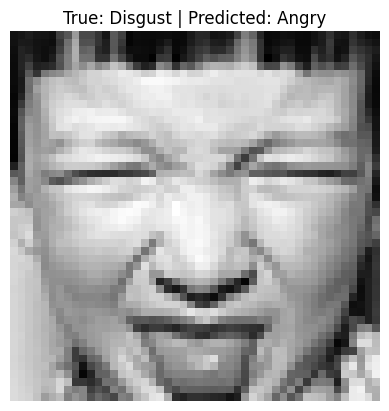

In [60]:
# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Select a sample index from the validation set
index = 10  # You can change this to test other images

# Image and true label from validation set
img = X_val[index]  # already normalized
true_label = np.argmax(y_val[index])  # if labels are one-hot

# Predict using trained model
prediction = model.predict(img.reshape(1, 48, 48, 1))
predicted_label = np.argmax(prediction)

# Show image with prediction result
import matplotlib.pyplot as plt

plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f"True: {emotion_labels[true_label]} | Predicted: {emotion_labels[predicted_label]}")
plt.axis('off')
plt.show()


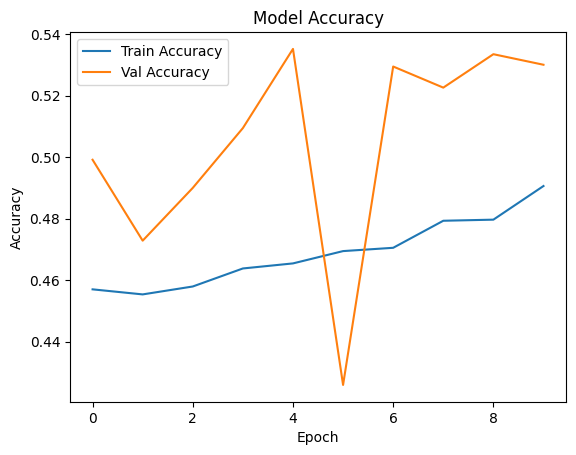

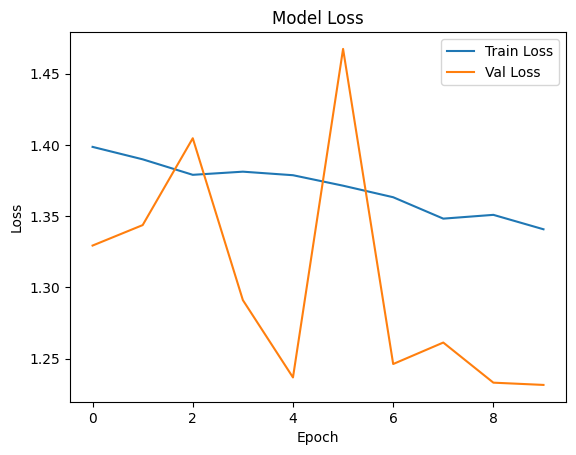

In [61]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [62]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.5291 - loss: 1.2264
Test Accuracy: 54.86%


In [63]:
# Save model to file
model.save("deepfer_model.h5")
print("Model saved successfully!")


Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


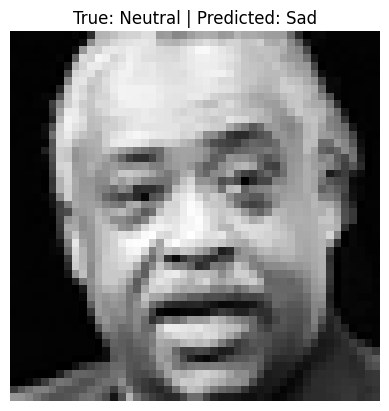

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


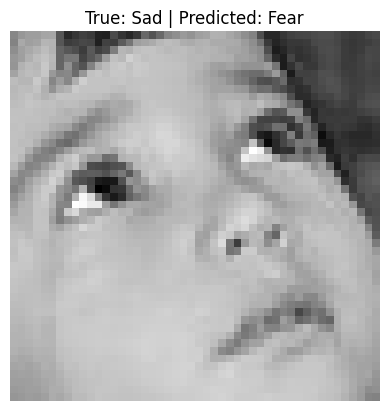

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


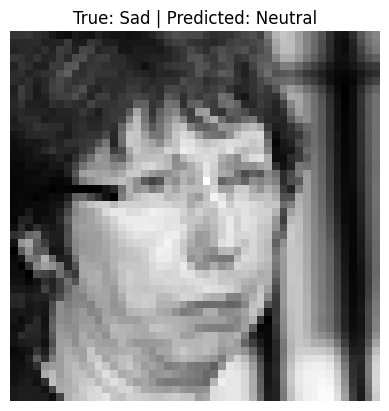

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


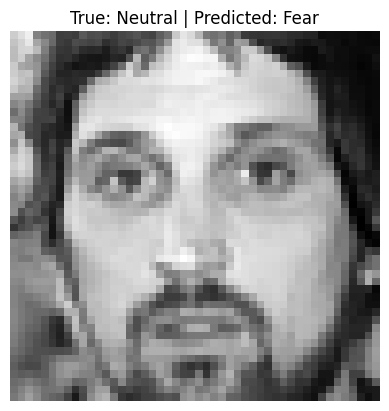

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


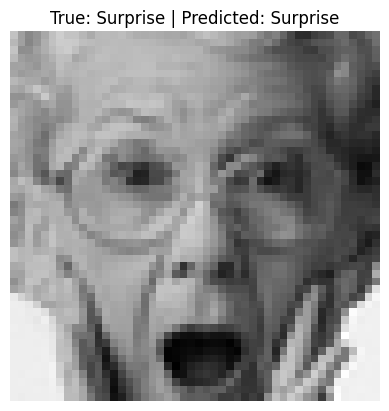

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Reverse mapping
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Pick a few test samples
for i in range(5):
    img = X_test[i]
    true_label = np.argmax(y_test[i])

    prediction = model.predict(img.reshape(1, 48, 48, 1))
    predicted_label = np.argmax(prediction)

    plt.imshow(img.reshape(48, 48), cmap='gray')
    plt.title(f"True: {emotion_labels[true_label]} | Predicted: {emotion_labels[predicted_label]}")
    plt.axis('off')
    plt.show()


In [65]:
pip install tensorflow opencv-python


In [66]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load model
model = load_model("deepfer_model.h5")
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi_gray, (48, 48))
        roi_normalized = roi_resized / 255.0
        roi_input = roi_normalized.reshape(1, 48, 48, 1)

        prediction = model.predict(roi_input)
        label = emotion_labels[np.argmax(prediction)]

        # Draw bounding box and label
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 100, 0), 2)
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.9, (0, 255, 0), 2)

    cv2.imshow("DeepFER - Real-Time Emotion Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [67]:
!python deepfer_live.py

2025-06-06 14:47:04.354913: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749221224.498157   66438 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749221224.564929   66438 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-06 14:47:12.341538: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
[ WARN:0@9.466] global cap_v4l.cpp:913 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@9.466] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range


In [68]:
%%writefile deepfer_live.py
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load model
model = load_model("deepfer_model.h5")
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi_gray, (48, 48))
        roi_normalized = roi_resized / 255.0
        roi_input = roi_normalized.reshape(1, 48, 48, 1)

        prediction = model.predict(roi_input)
        label = emotion_labels[np.argmax(prediction)]

        # Draw bounding box and label
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 100, 0), 2)
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.9, (0, 255, 0), 2)

    cv2.imshow("DeepFER - Real-Time Emotion Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Overwriting deepfer_live.py


In [69]:
from google.colab import files
uploaded = files.upload()


Saving Screenshot (224).png to Screenshot (224) (1).png


Current working directory: /content
Attempting to load image from: /content/Screenshot (224) (1).png
Files in current directory: ['.config', 'model_epoch_01.weights.h5', 'model_epoch_06.weights.h5', 'deepfer_model.h5', 'model_epoch_04.weights.h5', 'Screenshot (230).png', 'model_epoch_08.weights.h5', 'model_epoch_07.weights.h5', 'Screenshot (7).png', 'Screenshot (224).png', 'deepfer_live.py', 'model_epoch_03.weights.h5', 'model_epoch_09.weights.h5', 'model_epoch_05.weights.h5', 'model_epoch_10.weights.h5', 'Screenshot (319).png', 'Screenshot (7) (1).png', 'fer2013.csv', 'model_epoch_02.weights.h5', 'Screenshot (224) (1).png', 'sample_data']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


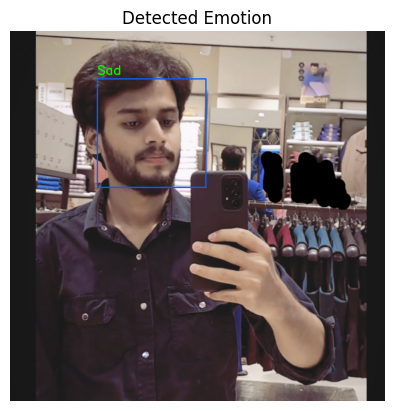

In [71]:
import cv2
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image # Import Pillow
import os # Import the os module

# Load model
model = load_model("deepfer_model.h5")

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load and preprocess image
img_path = 'Screenshot (224) (1).png'  # Change to your image name

# Debugging prints
print(f"Current working directory: {os.getcwd()}")
full_img_path = os.path.join(os.getcwd(), img_path)
print(f"Attempting to load image from: {full_img_path}")
print(f"Files in current directory: {os.listdir()}")


try:
    # Use Pillow to open the image
    pil_img = Image.open(img_path)
    # Convert PIL image to NumPy array (OpenCV format)
    img = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)
except FileNotFoundError:
    print(f"Error: Image file not found at {img_path}")
    img = None
except Exception as e:
    print(f"Error loading image with Pillow: {e}")
    img = None


if img is None:
    print(f"Error: Unable to load image from {img_path}")
else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Load Haar cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (48, 48))
        face = face / 255.0
        face = face.reshape(1, 48, 48, 1)

        prediction = model.predict(face)
        label = emotion_labels[np.argmax(prediction)]

        # Draw box and label
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 100, 0), 2)
        cv2.putText(img, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.9, (0, 255, 0), 2)

    # Show result
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Detected Emotion")
    plt.show()

In [ ]:
!ls

 deepfer_live.py    fer2013.csv  'Screenshot (224).png'
 deepfer_model.h5   sample_data


In [ ]:
!ls

 deepfer_live.py    fer2013.csv  'Screenshot (224).png'  'Screenshot (7).png'
 deepfer_model.h5   sample_data  'Screenshot (230).png'


In [ ]:
import tensorflow as tf
# tf.config.run_eagerly(True) # Eager execution is typically enabled by default in TF 2.x

In [72]:
from sklearn.metrics import classification_report

# Evaluate the model on the validation data
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Print classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=emotion_labels))

55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step
              precision    recall  f1-score   support

       Angry       0.41      0.29      0.34       241
     Disgust       0.00      0.00      0.00        29
        Fear       0.35      0.16      0.22       255
       Happy       0.71      0.86      0.78       435
         Sad       0.41      0.44      0.42       295
    Surprise       0.61      0.75      0.67       188
     Neutral       0.44      0.57      0.50       306

    accuracy                           0.53      1749
   macro avg       0.42      0.44      0.42      1749
weighted avg       0.50      0.53      0.50      1749



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
